# 1) Problem statement 
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.



2) The Dataset is collected from https://www.kaggle.com/datasets/susant4learning/holiday-package-prediction
. The data consists of 20 columns and 4888 rows.

In [75]:
## importing important libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [76]:
df=pd.read_csv("datasets/Travel.csv")
df=pd.DataFrame(df)

### Data cleaning 

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [78]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [79]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [80]:
df['Gender'].value_counts()
## we must check dataset very careafully so that any problem will not happen in it .


Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [81]:
df['MaritalStatus'].value_counts()
## single and unmarried same hona chaiye


MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [82]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [83]:
df['Occupation'].value_counts()

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

In [84]:
df['Designation'].value_counts()

Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

In [85]:
df['Gender']=df['Gender'].replace('Fe Male','Female')
df['MaritalStatus']=df['MaritalStatus'].replace('Single','Unmarried')

In [86]:
df['Gender'].value_counts()


Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [87]:
## Checking missing values 
###these are the features with nan value 
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na :
    print(feature,np.round(df[feature].isnull().mean()*100,5), ' % missing values '  )
    

Age 4.62357  % missing values 
TypeofContact 0.51146  % missing values 
DurationOfPitch 5.13502  % missing values 
NumberOfFollowups 0.92062  % missing values 
PreferredPropertyStar 0.53191  % missing values 
NumberOfTrips 2.86416  % missing values 
NumberOfChildrenVisiting 1.35025  % missing values 
MonthlyIncome 4.76678  % missing values 


In [88]:
## statistics on numerical columns ( Null columns)
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


## Imputing Null Values
1. Impute Median value for age column
2.  Impute Mode value for Type of contract 
3. Impute Median for Duration of Pitch 
4. Impute Mode for NumberofFollowup as it is dicreate feature
5. Impute Mode for PrefferedPropertyStar
6. Impute Median for NumberofTrips 
7. Impute Mode for NumberofChildrenVisiting 

In [89]:
## Age 
df.Age.fillna(df.Age.median(),inplace=True)

## TypeofContract 
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)

## DurationofPitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)

## NumberofFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode(),inplace=True)

## PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode(),inplace=True)

## NumberofTrips 
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)

##NumbeofchildrenVisiting 
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode(),inplace=True)


df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Unmarried,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Unmarried,3.0,0,5,0,2.0,Executive,20289.0


### Feature Enginnering 
Feature Extraction 

In [90]:
## create new column for feature 
df['TotalVisiting']=df['NumberOfPersonVisiting']+df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'])

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,Manager,26576.0,4.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,5.0,Basic,3.0,Unmarried,3.0,1,3,1,Executive,21212.0,6.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4.0,Standard,4.0,Married,7.0,0,1,1,Senior Manager,31820.0,7.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,4.0,Basic,3.0,Unmarried,3.0,0,5,0,Executive,20289.0,5.0


In [91]:
## get all all numeric Features 
num_features = [ feature for feature in df.columns if df[feature].dtype!='O']
print(num_features)


['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome', 'TotalVisiting']


In [92]:
## catergorical features 
cat_features=[feature for feature in df.columns if df[feature].dtypes=='O' ]
print('Number of categorical features:',len(cat_features))

Number of categorical features: 6


In [93]:
## Discrete features 
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25 ]
print('Number of Discrete features:',len(cat_features))

Number of Discrete features: 6


In [94]:
## Continuor features 
Continous_features=[feature for feature in num_features if feature  not in discrete_features]
print('Number of continous features :' , len(Continous_features))

Number of continous features : 4


In [95]:
from sklearn.model_selection import train_test_split
X=df.drop(['ProdTaken'],axis=1)
Y=df['ProdTaken']

In [96]:
Y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [97]:
X.value_counts()

CustomerID  Age   TypeofContact    CityTier  DurationOfPitch  Occupation      Gender  NumberOfPersonVisiting  NumberOfFollowups  ProductPitched  PreferredPropertyStar  MaritalStatus  NumberOfTrips  Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  Designation     MonthlyIncome  TotalVisiting
200000      41.0  Self Enquiry     3         6.0              Salaried        Female  3                       3.0                Deluxe          3.0                    Unmarried      1.0            1         2                       1       0.0                       Manager         20993.0        3.0              1
200001      49.0  Company Invited  1         14.0             Salaried        Male    3                       4.0                Deluxe          4.0                    Divorced       2.0            0         3                       1       2.0                       Manager         20130.0        5.0              1
200002      37.0  Self Enquiry     1         8.0         

In [98]:
from sklearn.model_selection import train_test_split
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST=train_test_split(X,Y,test_size=0.33,random_state=42)

In [99]:
X_TRAIN

,CustomerID,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TotalVisiting
2962,202962,39.0,Self Enquiry,3,14.0,Small Business,Female,3,5.0,Deluxe,3.0,Unmarried,2.0,0,2,1,2.0,Manager,22706.0,5.0
1788,201788,27.0,Self Enquiry,1,11.0,Salaried,Female,2,3.0,Basic,4.0,Unmarried,2.0,1,3,0,1.0,Executive,17478.0,3.0
3499,203499,35.0,Company Invited,1,22.0,Small Business,Male,4,4.0,Super Deluxe,5.0,Married,3.0,0,4,1,3.0,AVP,35685.0,7.0
3173,203173,36.0,Self Enquiry,1,32.0,Small Business,Female,3,4.0,Standard,3.0,Married,3.0,1,3,1,2.0,Senior Manager,29066.0,5.0
3126,203126,33.0,Company Invited,1,7.0,Salaried,Female,4,5.0,Basic,4.0,Divorced,8.0,0,3,1,1.0,Executive,21010.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,204426,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Unmarried,2.0,0,1,1,2.0,Executive,20723.0,5.0
466,200466,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.0,4.0
3092,203092,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.0,5.0
3772,203772,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,3.0,0,1,1,2.0,Manager,22218.0,5.0


In [100]:
X_TEST


,CustomerID,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TotalVisiting
144,200144,32.0,Company Invited,3,13.0,Small Business,Male,2,5.0,Deluxe,3.0,Married,1.0,0,2,0,1.0,Manager,19668.0,3.0
79,200079,46.0,Self Enquiry,2,11.0,Small Business,Male,3,NaN,Deluxe,4.0,Married,1.0,1,5,0,1.0,Manager,20021.0,4.0
2098,202098,37.0,Self Enquiry,3,22.0,Small Business,Male,3,4.0,Deluxe,3.0,Married,5.0,0,5,1,0.0,Manager,21334.0,3.0
4738,204738,43.0,Self Enquiry,1,36.0,Small Business,Male,3,6.0,Deluxe,3.0,Unmarried,6.0,0,3,1,2.0,Manager,22950.0,5.0
2858,202858,25.0,Self Enquiry,3,7.0,Large Business,Female,4,4.0,Basic,4.0,Unmarried,3.0,1,4,1,3.0,Executive,21880.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,201227,36.0,Self Enquiry,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,5,0,2.0,Executive,18477.0,5.0
3463,203463,37.0,Self Enquiry,3,23.0,Small Business,Female,4,5.0,Deluxe,5.0,Divorced,6.0,0,5,1,1.0,Manager,24325.0,5.0
2274,202274,48.0,Company Invited,1,6.0,Small Business,Male,2,1.0,Super Deluxe,3.0,Unmarried,3.0,0,1,0,0.0,AVP,31885.0,2.0
4404,204404,39.0,Self Enquiry,1,7.0,Salaried,Female,3,4.0,Basic,5.0,Unmarried,5.0,0,1,0,2.0,Executive,21297.0,5.0


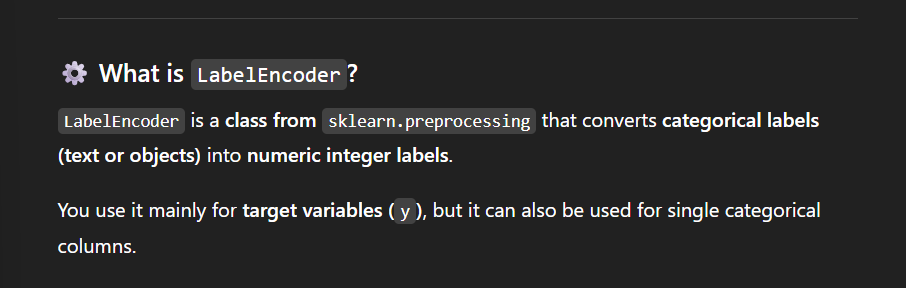

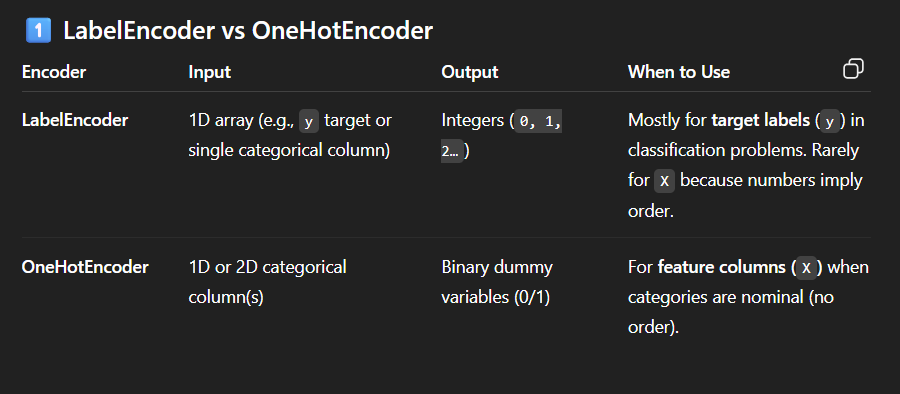

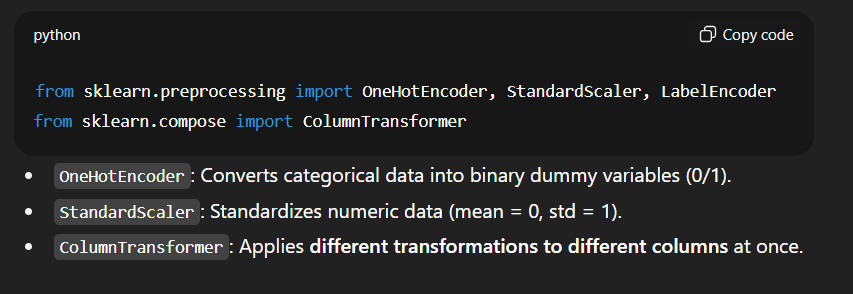

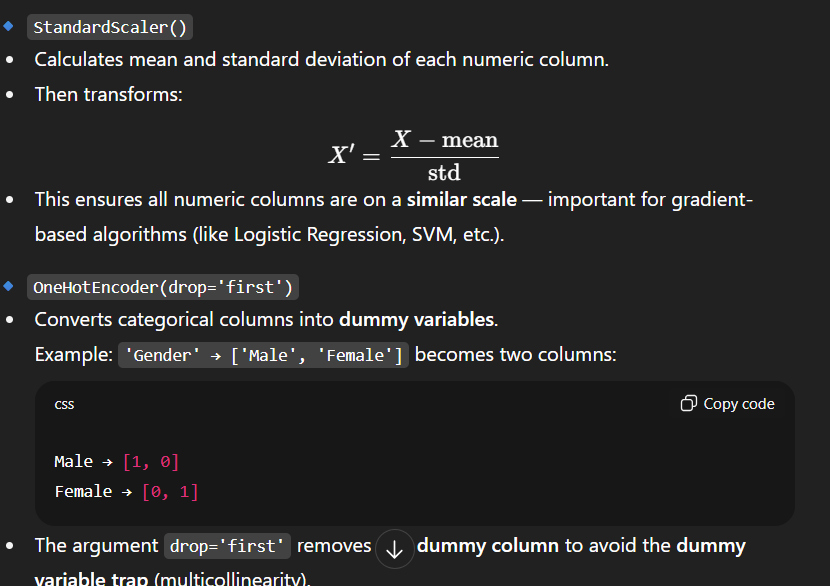

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
X_TRAIN=pd.DataFrame(X_TRAIN)  ##  changing numpydarray into the dataframe 
X_TEST=pd.DataFrame(X_TEST)     ## changing numpydarray into the dataframe
cat_features = X_TRAIN.select_dtypes(include="object").columns
num_features = X_TRAIN.select_dtypes(exclude="object").columns

# 5️⃣ Define transformers
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

# 6️⃣ Combine
preprocessor = ColumnTransformer([
    ("onehot", oh_transformer, cat_features),
    ("scaler", numeric_transformer, num_features)
])

# 7️⃣ Apply only on X (not Y)
X_TRAIN = preprocessor.fit_transform(X_TRAIN)
X_TEST = preprocessor.transform(X_TEST)

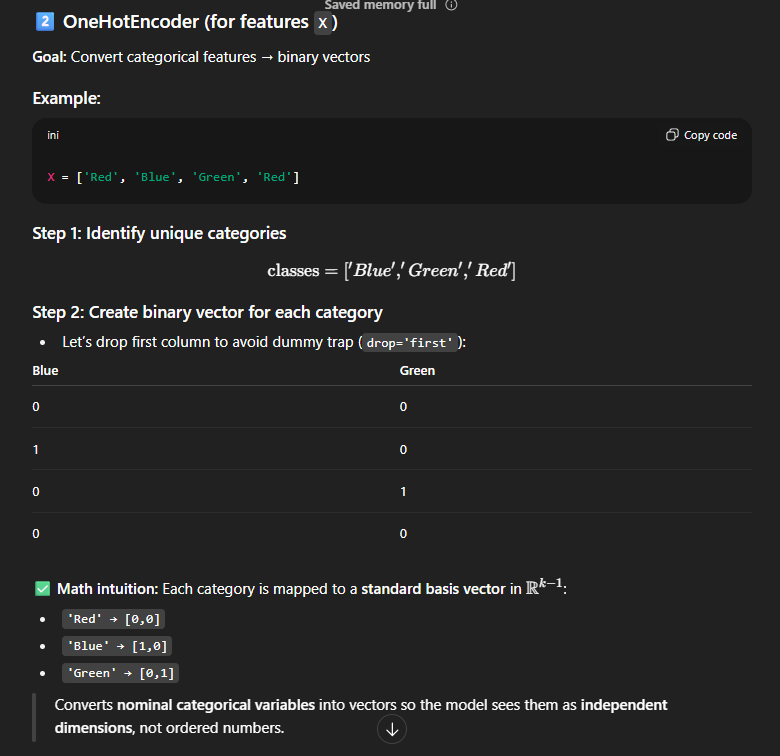
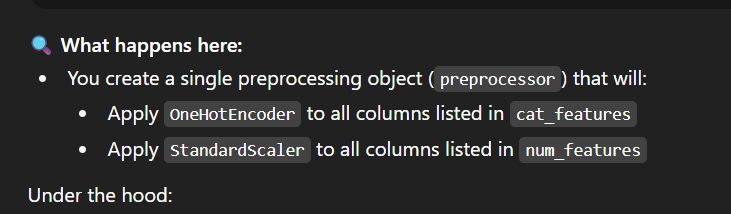
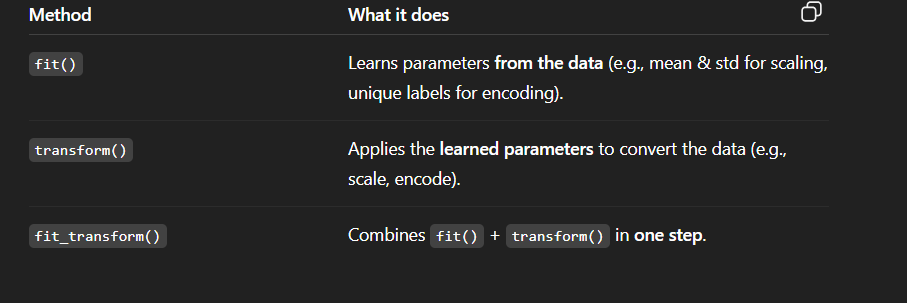

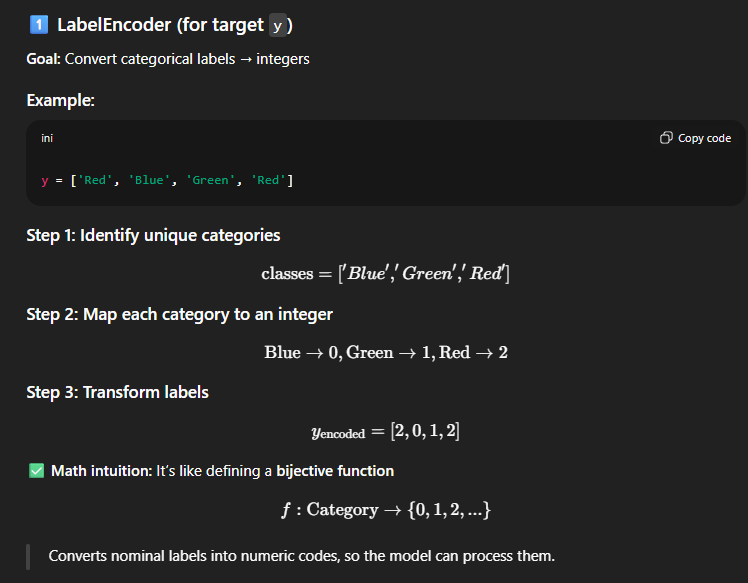

In [109]:
X_TRAIN

array([[ 1.        ,  0.        ,  0.        , ...,  0.93338077,
        -0.16790393,  0.63135203],
       [ 1.        ,  0.        ,  1.        , ..., -0.22740811,
        -1.12450723, -0.77669611],
       [ 0.        ,  0.        ,  0.        , ...,  2.09416965,
         2.2069534 ,  2.03940016],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.93338077,
        -0.36094457,  0.63135203],
       [ 1.        ,  0.        ,  0.        , ...,  0.93338077,
        -0.25719666,  0.63135203],
       [ 0.        ,  0.        ,  1.        , ..., -1.38819699,
        -1.05589088, -1.48072018]], shape=(3274, 29))

In [110]:
X_TEST

array([[ 0.        ,  0.        ,  0.        , ..., -0.22740811,
        -0.72378779, -0.77669611],
       [ 1.        ,  0.        ,  0.        , ..., -0.22740811,
        -0.65919694, -0.07267204],
       [ 1.        ,  0.        ,  0.        , ..., -1.38819699,
        -0.41894825, -0.77669611],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -1.38819699,
         1.51164114, -1.48072018],
       [ 1.        ,  0.        ,  1.        , ...,  0.93338077,
        -0.4257184 ,  0.63135203],
       [ 1.        ,  0.        ,  0.        , ...,  0.93338077,
        -0.52123235,  0.63135203]], shape=(1614, 29))

## Machine learning training


In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix, precision_score,recall_score,f1_score,roc_auc_score,roc_curve


models={
"Random Forest ": RandomForestClassifier(),
"Decision Tree":DecisionTreeClassifier()

}

for model_name, model in models.items():
    # Train the model
    model.fit(X_TRAIN, Y_TRAIN)
    
    # Make predictions
    y_train_pred = model.predict(X_TRAIN)
    y_test_pred = model.predict(X_TEST)
    
    # Training performance
    train_acc = accuracy_score(Y_TRAIN, y_train_pred)
    train_f1 = f1_score(Y_TRAIN, y_train_pred, average='weighted')
    
    # Testing performance
    test_acc = accuracy_score(Y_TEST, y_test_pred)
    test_f1 = f1_score(Y_TEST, y_test_pred, average='weighted')
    
    # Print results
    print(f"Model: {model_name}")
    print(f"Train Accuracy: {train_acc:.4f}, Train F1: {train_f1:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}, Test F1: {test_f1:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(Y_TEST, y_test_pred))
    print("Classification Report:\n", classification_report(Y_TEST, y_test_pred))
    print("-"*50)


Model: Random Forest 
Train Accuracy: 1.0000, Train F1: 1.0000
Test Accuracy: 0.9002, Test F1: 0.8887
Confusion Matrix:
 [[1304   17]
 [ 144  149]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      1321
           1       0.90      0.51      0.65       293

    accuracy                           0.90      1614
   macro avg       0.90      0.75      0.80      1614
weighted avg       0.90      0.90      0.89      1614

--------------------------------------------------
Model: Decision Tree
Train Accuracy: 1.0000, Train F1: 1.0000
Test Accuracy: 0.8848, Test F1: 0.8852
Confusion Matrix:
 [[1225   96]
 [  90  203]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      1321
           1       0.68      0.69      0.69       293

    accuracy                           0.88      1614
   macro avg       0.81      0.81      0.81      1614
weighte

In [105]:
## hyperparameter training 
rf_params={
    'max_depth':[5,8,15,10],
    'max_features':[5,7,"auto",8],
    "min_samples_split":[2,8,15,20],
    "n_estimators":[100,200,500,1000]
}

In [106]:
## models list for hyperparameter tuning 
randomcv_models=[
    ("RF", RandomForestClassifier(),rf_params)
]

In [107]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [108]:
from sklearn.model_selection import RandomizedSearchCV
model_param={}
for name, model, params in randomcv_models:
    random=RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=3,verbose=2,n_jobs=-1)
    random.fit(X_TRAIN,Y_TRAIN)
    model_param[name]=random.best_params_
for model_name in model_param:
    print(f"-----------------------------Best params for {model_name } ----------------------------------   " )
    print(model_param[model_name])
          

Fitting 3 folds for each of 100 candidates, totalling 300 fits
-----------------------------Best params for RF ----------------------------------   
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 8, 'max_depth': 15}
